In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import seaborn as sns


In [32]:
#Ignorar os alertas 
import warnings
warnings.filterwarnings("ignore")

In [67]:
df_iris=pd.read_csv('iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
dataset = df_iris.replace({'Species': {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})

Como temos apenas colunas categóricas, vamos transformar as Spécies

In [69]:
dataset.pop('Id')

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [70]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Text(0.5, 1.0, 'Correlação na classses Iris')

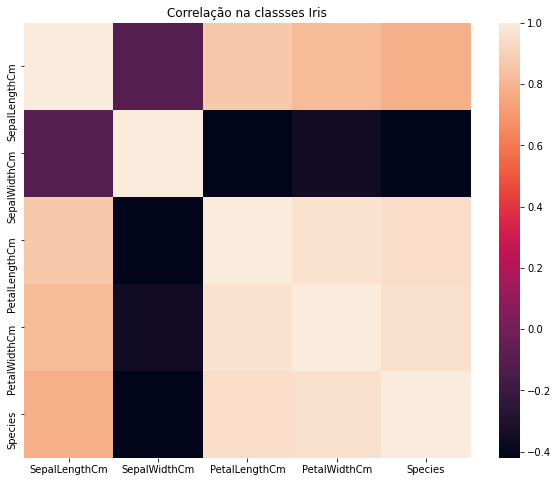

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr())
plt.title('Correlação na classses Iris')

In [72]:
#Estatística básica
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [73]:
#Informações da base
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [74]:
#target = iris.pop('target')
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:, -1].values

In [75]:
#Importando o svm
svc = SVC(gamma="auto")

In [76]:
#Testando o modelo na base
cv = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')

In [77]:
#Acurácia em porcentagem do modelo
print('Acurácia com cross validation:', cv.mean()*100)

Acurácia com cross validation: 98.00000000000001


O referido modelo conseguiu acurácia de 98%

In [78]:
svc.fit(X,Y)

SVC(gamma='auto')

'Species': {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 98.18 %
Standard Deviation: 3.64 %


In [79]:
#Fazer predição sobre qual classe pertence a flor com as seguintes medidas
svc.predict([[6.9,2.8,6.1,2.3]])

array([3], dtype=int64)

In [80]:
svc.predict([[5.1,3.6,1.4,0.2]])

array([1], dtype=int64)